## Construct Confusion Matrix


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
#Downloading training data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

#Downloading test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
#Class labels

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


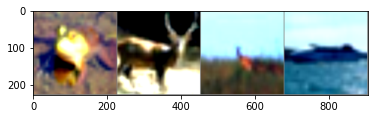

 frog  deer  deer  ship


In [5]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
#Now using the AlexNet
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Model description
AlexNet_model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
AlexNet_model.to(device)

cpu


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [21]:
#Testing Accuracy
pred_labels=[]
true_labels=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        true_labels.extend(labels.numpy())
        outputs = AlexNet_model(images)
        predicted = torch.max(outputs.data, 1)[1]
        pred_labels.extend(predicted.numpy())

In [35]:
# get the top 10 most frequent predicted labels
from collections import Counter
top_10=Counter(pred_labels).most_common(10)
top10_predLabels=[i[0] for i in top_10]
top10_predLabels

[675, 335, 339, 510, 167, 194, 856, 152, 653, 491]

Construct the Confusion matrix

In [63]:
#calculate the occurance of combination of top10 predicted labels and true labels
d={675:[], 335:[], 339:[], 510:[], 167:[], 194:[], 856:[], 152:[], 653:[], 491:[]}
for predLabel in top10_predLabels:
  for i in range(0,10):
    count=0
    for key, value in enumerate(pred_labels):
      if value==predLabel and true_labels[key]==i:
        count+=1
    d[predLabel].append(count)


In [64]:
import pandas as pd

d=pd.DataFrame(d)
d=d.assign(TrueLabel=classes)
d.set_index("TrueLabel", inplace=True)
#get the ImageNet class text labels for top10_predLabels
cols={675: 'moving van', 335:'fox squirrel, eastern fox squirrel, Sciurus niger', 339:'sorrel', \
      510:'container ship, containership, container vessel', \
      167:'English foxhound', 194: 'Dandie Dinmont, Dandie Dinmont terrier', \
      856:'thresher, thrasher, threshing machine', \
      152:'Japanese spaniel', 653:'milk can', 491:'chain saw, chainsaw'}
d.rename(columns=cols, inplace=True)

In [65]:
d

,moving van,"fox squirrel, eastern fox squirrel, Sciurus niger",sorrel,"container ship, containership, container vessel",English foxhound,"Dandie Dinmont, Dandie Dinmont terrier","thresher, thrasher, threshing machine",Japanese spaniel,milk can,"chain saw, chainsaw"
TrueLabel,,,,,,,,,,
airplane,54,6,2,32,2,1,49,2,10,26
automobile,433,5,0,6,3,2,52,1,34,83
bird,1,134,7,0,12,9,4,10,18,5
cat,8,115,5,0,48,40,0,55,46,4
deer,0,136,87,2,41,20,6,5,13,0
dog,0,30,4,0,97,160,0,125,10,1
frog,0,213,2,0,5,14,1,3,14,1
horse,13,18,288,2,91,10,12,43,18,3
ship,102,6,2,284,1,0,5,1,36,2


## Output of the fc6 layer

In [10]:
#get the name and layer in the model architecture
names=[]
layers=[]
for name, layer in AlexNet_model.named_modules():
  names.append(name)
  layers.append(layer)

In [11]:
#get the name and layer of fc6
layers[18], names[18]

(Linear(in_features=9216, out_features=4096, bias=True), 'classifier.1')

In [28]:
#get the name and layer of fc7
layers[21], names[21]

(Linear(in_features=4096, out_features=4096, bias=True), 'classifier.4')

In [30]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
layers[18].register_forward_hook(get_activation(names[18]))
layers[21].register_forward_hook(get_activation(names[21]))

#change the testloader to load test data one time
testloader = torch.utils.data.DataLoader(test_data, batch_size=10000, shuffle=False, num_workers=2)

#store the y_test label
y_test=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        y_test.extend(labels.numpy())
        outputs = AlexNet_model(test_data)
        print('.', end='')


RuntimeError: ignored

In [17]:
activation[names[18]].size()

torch.Size([4, 4096])

In [18]:
y_test

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,
